<a href="https://colab.research.google.com/github/pravin-pk/Contactless-Payment-Server/blob/main/Final_year_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import tensorflow as tf
# import numpy as np

In [ ]:
# (x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

In [ ]:
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# print(x_train.shape)
# print(x_test.shape)

In [ ]:
# model = tf.keras.models.Sequential([
# #  tf.keras.layers.Flatten(input_shape=(28,28)),
#  tf.keras.layers.Dense(784, activation='relu',input_shape=(784,)),
#  tf.keras.layers.Dense(256, activation='relu'),
# #  tf.keras.layers.Dropout(0.2),
#  tf.keras.layers.Dense(128, activation='relu'),
#  tf.keras.layers.Dense(32, activation='relu'),
#  tf.keras.layers.Dense(8)
# ])

In [ ]:
# model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# model.summary()

In [ ]:
# model.fit(x_train, x_train, epochs=10)


------

In [ ]:
# !pip install tensorflow==2.10.0

-----

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !rm -rf 'ROI'

In [ ]:
from zipfile import ZipFile
# PUT YOUR LOCAL FILE PATH HERE
with ZipFile('./drive/MyDrive/Final Year Project/Datasets/ROI.zip', 'r') as zipObj:
   # Extract a specific file from zip file
   zipObj.extractall('./')

In [ ]:
# image_generator = ImageDataGenerator(rescale=1.0/255)

In [ ]:
# palm_train = image_generator.flow_from_directory('./IITD_dataset/', class_mode='sparse')

In [ ]:
# import numpy as np
# from PIL import Image
# import glob

# images = []
# for file in glob.glob('./Segmented/Right/*.JPG'):
#     image = Image.open(file).convert('L')
#     numpy_array = np.array(image)
#     images.append(numpy_array)
# for file in glob.glob('./Segmented/Left/*.JPG'):
#     image = Image.open(file).convert('L')
#     numpy_array = np.array(image)
#     images.append(numpy_array)

# palm_arrays = np.array(images)

In [ ]:
import os
import shutil
import re

# Source and destination directories
dest_dir = './ROI/allImages/'
os.makedirs(dest_dir)

# Regex pattern to match specific files
pattern = re.compile(r'\d{3}_\d\.JPG')

# Loop through files in source directory
for file in os.listdir('./ROI/Right/'):
    # Check if file matches pattern
    if pattern.match(file):
        # Move file to destination directory
        shutil.copy(os.path.join('./ROI/Right/', file), os.path.join(dest_dir,f'Right_{file}'))

# Loop through files in source directory
for file in os.listdir('./ROI/Left/'):
    # Check if file matches pattern
    if pattern.match(file):
        # Move file to destination directory
        shutil.copy(os.path.join('./ROI/Left/', file), os.path.join(dest_dir,f'Left_{file}'))

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Initialize list to store images
images = []

# for filename in os.listdir("./ROI/Left/"):
#     # Read image
#     img = cv2.imread(os.path.join("./ROI/Left/",filename), 0)
    
#     # Append image to list
#     images.append(img)
# for filename in os.listdir("./ROI/Right/"):
#     # Read image
#     img = cv2.imread(os.path.join("./ROI/Right/",filename), 0)
    
#     # Append image to list
#     images.append(img)


# Loop through images in directory
filenames = []
for filename in os.listdir("./ROI/allImages/"):
    filenames.append(filename)
    # Read image
    img = cv2.imread(os.path.join("./ROI/allImages/",filename), 0)
    
    # Append image to list
    images.append(img)

palm_arrays = np.array(images)

In [ ]:
palm_arrays.shape

(2601, 150, 150)

In [ ]:
x_train = palm_arrays[:2400]
x_test = palm_arrays[2400:]
print(x_train.shape)
print(x_test.shape)

(2400, 150, 150)
(201, 150, 150)


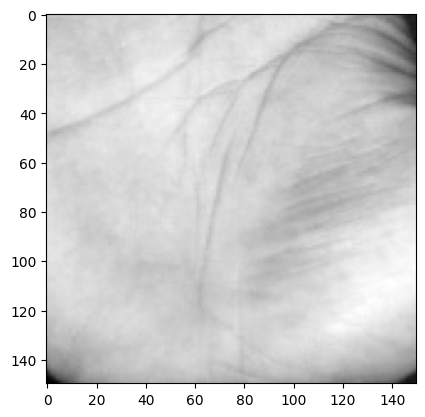

In [ ]:
plt.imshow(x_train[0], cmap='gray')

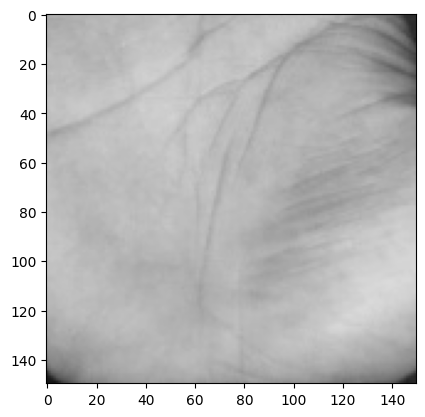

In [ ]:
import cv2
plt.imshow(cv2.cvtColor(x_train[0], cv2.COLOR_BGR2RGB))

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train = x_train.reshape(-1, 150, 150, 1)
x_test = x_test.reshape(-1, 150, 150, 1)
print(x_train.shape)
print(x_test.shape)

(2400, 150, 150, 1)
(201, 150, 150, 1)


In [ ]:
import tensorflow as tf
from tensorflow import keras

input_img = keras.Input(shape=(150,150,1)) # shape = (width, height, channels)
encoded = keras.layers.Conv2D(7, (3,3), activation='relu', padding='same')(input_img)
encoded = keras.layers.MaxPooling2D((2,2))(encoded)
encoded = keras.layers.Conv2D(9, (3,3), activation='relu', padding='same')(encoded)
encoded = keras.layers.MaxPooling2D((3,3))(encoded)
# encoded = keras.layers.Conv2D(1, (3,3), activation='relu', padding='same')(encoded)
encoded = keras.layers.Flatten()(encoded)
encoded = keras.layers.Dropout(0.3)(encoded)
encoded = keras.layers.Dense(24*24, activation='relu')(encoded)
encoded = keras.layers.Dense(256, activation='relu')(encoded)
# encoded = keras.layers.Dense(64, activation='relu')(encoded)
encoded = keras.layers.Dense(32, activation='relu')(encoded)

decoded_dense0 = keras.layers.Dense(32, activation='relu')(encoded)
# decoded_dense1 = keras.layers.Dense(64, activation='relu')(decoded_dense0)
decoded_dense2 = keras.layers.Dense(256, activation='relu')(decoded_dense0)
decoded_dense3 = keras.layers.Dense(25*25, activation='relu')(decoded_dense2)
decoded_reshaped = keras.layers.Reshape((25,25,1))(decoded_dense3)
decoded_conv0 = keras.layers.Conv2D(9, (3,3), activation='relu', padding='same')(decoded_reshaped)
decoded_upSample0 = keras.layers.UpSampling2D((3,3))(decoded_conv0)
decoded_conv1 = keras.layers.Conv2D(7, (3,3), activation='relu', padding='same')(decoded_upSample0)
decoded_upSample1 = keras.layers.UpSampling2D((2,2))(decoded_conv1)
decoded = keras.layers.Conv2D(1, (3,3), activation='relu', padding='same')(decoded_upSample1)


autoencoder = keras.Model(input_img, decoded)

In [ ]:
# Encoder Model
encoder = keras.Model(input_img, encoded)

In [ ]:
# Decoder Model
# encoded_inputs = keras.Input(shape=(64,))
# decoded_layers = decoded[-8]

# decoder = keras.Model(encoded_inputs, decoded_layers)

In [ ]:
encoder.layers

In [ ]:
# encoder.compile(optimizer='adam', loss=tf.keras.losses.mae)

In [ ]:
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 7)       70        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 7)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 9)         576       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 9)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 5625)              0     

In [ ]:
autoencoder.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/10
75/75 [==============================] - 93s 1s/step - loss: 1.2562 - val_loss: 0.6921
Epoch 2/10
75/75 [==============================] - 82s 1s/step - loss: 0.6751 - val_loss: 0.6402
Epoch 3/10
75/75 [==============================] - 79s 1s/step - loss: 0.6302 - val_loss: 0.6239
Epoch 4/10
75/75 [==============================] - 80s 1s/step - loss: 0.6140 - val_loss: 0.6284
Epoch 5/10
75/75 [==============================] - 81s 1s/step - loss: 0.6046 - val_loss: 0.5970
Epoch 6/10
75/75 [==============================] - 82s 1s/step - loss: 0.5955 - val_loss: 0.5916
Epoch 7/10
75/75 [==============================] - 79s 1s/step - loss: 0.5934 - val_loss: 0.5888
Epoch 8/10
75/75 [==============================] - 76s 1s/step - loss: 0.5866 - val_loss: 0.5845
Epoch 9/10
75/75 [==============================] - 79s 1s/step - loss: 0.5838 - val_loss: 0.5835
Epoch 10/10
75/75 [==============================] - 78s 1s/step - loss: 0.5824 - val_loss: 0.5811


In [ ]:
plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
encoded_palms = encoder.predict(x_test)

In [ ]:
encoded_palms.shape

In [ ]:
encoded_palms[9]

In [ ]:
encoder.save('savedModel/model/0000001')

In [ ]:
import tarfile
import os

def make_tarfile(output_filename, source_dir):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=os.path.basename(source_dir))

# make_tarfile("destination", "source")
# CHANGE THE DESTINATION LOCATION AND UPLOAD THE TAR FILE TO DRIVE
make_tarfile("./drive/MyDrive/Final Year Project/Datasets/savedModel/model.tar.gz", "./savedModel/model/")

In [ ]:
# !zip -r ./savedModel/palm_encoder.zip ./savedModel/encoder_conv_model

In [ ]:
# from google.colab import files
# files.download("./savedModel/model.tar.gz")

In [ ]:
img = cv2.imread('./ROI/Right/003_3.JPG', 0)
palm = np.array(img.astype('float32')/255.0)

normal = encoder.predict(palm.reshape(-1, 150, 150, 1))

In [ ]:
plt.imshow(palm, cmap='gray')
print(normal)

In [ ]:
img = cv2.imread('./ROI/Right/008_3.JPG', 0)
palm = np.array(img.astype('float32')/255.0)

abnormal = encoder.predict(palm.reshape(-1, 150, 150, 1))

In [ ]:
plt.imshow(palm, cmap='gray')
print(normal)

In [ ]:
np.mean(np.abs(normal - abnormal))

In [ ]:
fig, ax = plt.subplots(1,3)
img = cv2.imread('./ROI/Left/005_2.JPG', 0)
palm = np.array(img.astype('float32')/255.0)
ax[0].imshow(palm, cmap='gray')
ax[0].set_title("Original")

auto = autoencoder.predict(palm.reshape(-1, 150, 150, 1))
# auto = decoder.predict(encoder.predict(palm.reshape(-1,150,150,1)))
auto = auto.reshape(150,150)
ax[1].imshow(auto, cmap='gray')
ax[1].set_title("AutoEncoder Output")

encoded_img = encoder.predict(palm.reshape(-1, 150, 150, 1))
encoded_img = encoded_img.reshape(4,8)
ax[2].imshow(encoded_img, cmap='gray')
ax[2].set_title("Encoder Output")

plt.show()

In [ ]:
plt.imshow(auto, cmap='gray')

In [ ]:
# img = x_test[80].reshape(-1, 150, 150, 1)
# encoder.predict(img)

---

## loading model and clustering the test ROI images

In [ ]:
# !mkdir "savedModel"
# !mkdir "savedModel/model"

In [ ]:
!tar -xvzf "./drive/MyDrive/Final Year Project/Datasets/savedModel/model_n.tar.gz" -C "savedModel/model/"

tar: Removing leading `/' from member names
/
0000001/
0000001/assets/
0000001/keras_metadata.pb
0000001/saved_model.pb
0000001/variables/
0000001/variables/variables.data-00000-of-00001
0000001/variables/variables.index


In [ ]:
model = tf.keras.models.load_model('savedModel/model/0000001')

In [ ]:
tests = model.predict(x_test)

NameError: ignored

In [ ]:
tests.shape

(201, 32)

In [ ]:
# rm -rf testROI

In [ ]:
from zipfile import ZipFile
import os
import cv2
import numpy as np

with ZipFile('./drive/MyDrive/Final Year Project/Datasets/testROI.zip', 'r') as zipObj:
   # Extract a specific file from zip file
   zipObj.extractall('./')

testfilenames = []
images = []
for filename in sorted(os.listdir("./testROI")):
# for filename in (os.listdir("./testROI")):
    testfilenames.append(filename)
    # Read image
    img = cv2.imread(os.path.join("./testROI/",filename), 0)
    
    # Append image to list
    images.append(img)

palm_arrays = np.array(images)

In [ ]:
palm_arrays = palm_arrays.astype('float32') / 255.
palm_arrays = palm_arrays.reshape(-1, 150, 150, 1)
print(palm_arrays.shape)

(15, 150, 150, 1)


In [ ]:
tests = model.predict(palm_arrays)

1/1 [==============================] - 0s 324ms/step


In [ ]:
testfilenames

['004_1.JPG',
 '004_2.JPG',
 '004_3.JPG',
 '004_4.JPG',
 '004_5.JPG',
 '029_2.JPG',
 '029_3.JPG',
 '029_4.JPG',
 '029_5.JPG',
 '029_6.JPG',
 '056_1.JPG',
 '056_2.JPG',
 '056_3.JPG',
 '056_4.JPG',
 '056_5.JPG']

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=3)
kmeans.fit(tests)

KMeans(n_clusters=3, n_init=3)

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
for i in range(len(testfilenames)):
  print("image: ", testfilenames[i], ", cluster: ", kmeans.labels_[i])

image:  004_1.JPG , cluster:  1
image:  004_2.JPG , cluster:  1
image:  004_3.JPG , cluster:  1
image:  004_4.JPG , cluster:  1
image:  004_5.JPG , cluster:  1
image:  029_2.JPG , cluster:  2
image:  029_3.JPG , cluster:  2
image:  029_4.JPG , cluster:  2
image:  029_5.JPG , cluster:  1
image:  029_6.JPG , cluster:  2
image:  056_1.JPG , cluster:  0
image:  056_2.JPG , cluster:  0
image:  056_3.JPG , cluster:  0
image:  056_4.JPG , cluster:  0
image:  056_5.JPG , cluster:  0
